In [282]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns
%matplotlib inline

## SVD as image compression


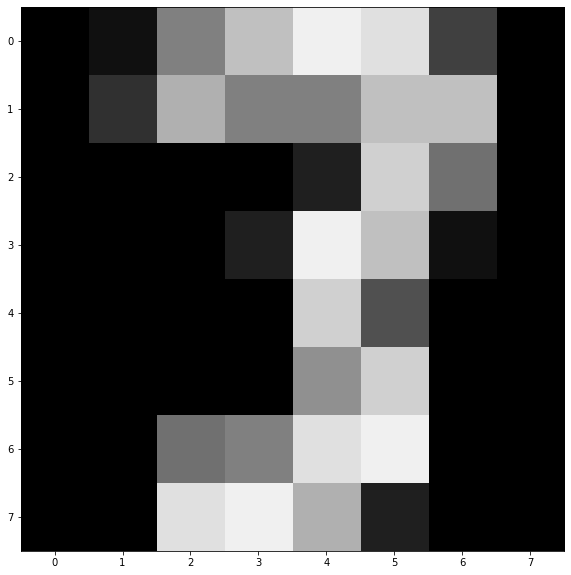

In [275]:
digits = load_digits()
sample = digits.images[23]
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(sample,cmap='gray',vmin=0, vmax=16)

In [274]:
sample.max()

15.0

In [143]:
u, sigma, vt = np.linalg.svd(sample)
sigma

array([50.99486128, 20.58122669, 15.32690059,  6.64275359,  2.73114517,
        1.19917478,  0.        ,  0.        ])

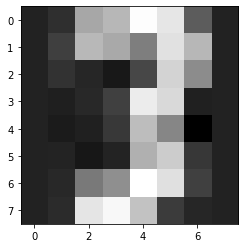

In [138]:
def get_svd_component(i):
    return np.outer((u[:, i] * sigma[i]), vt[i, :])

res = np.zeros(shape=(8,8))
for i in range(3):
    comp_i = get_svd_component(i)
    # print(comp_i)
    res += comp_i
plt.imshow((res),cmap='gray')

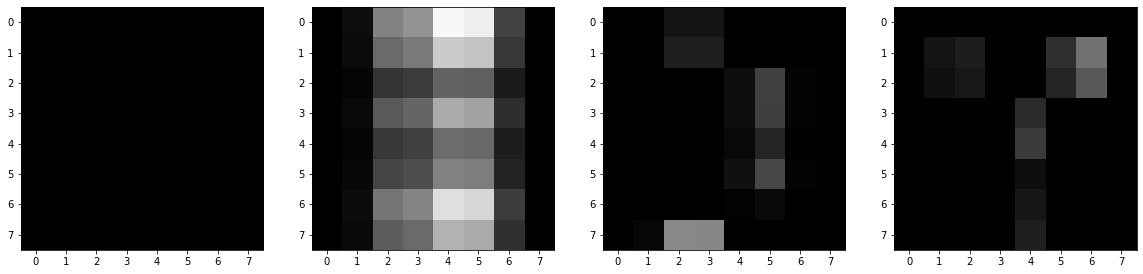

In [276]:
fig, ax = plt.subplots(ncols=4,figsize = (20,5))
ax[0].imshow(res,cmap='gray')
for i, a in enumerate(ax[1:]):
    a.imshow(get_svd_component(i),cmap='gray',vmin=0,vmax=16)


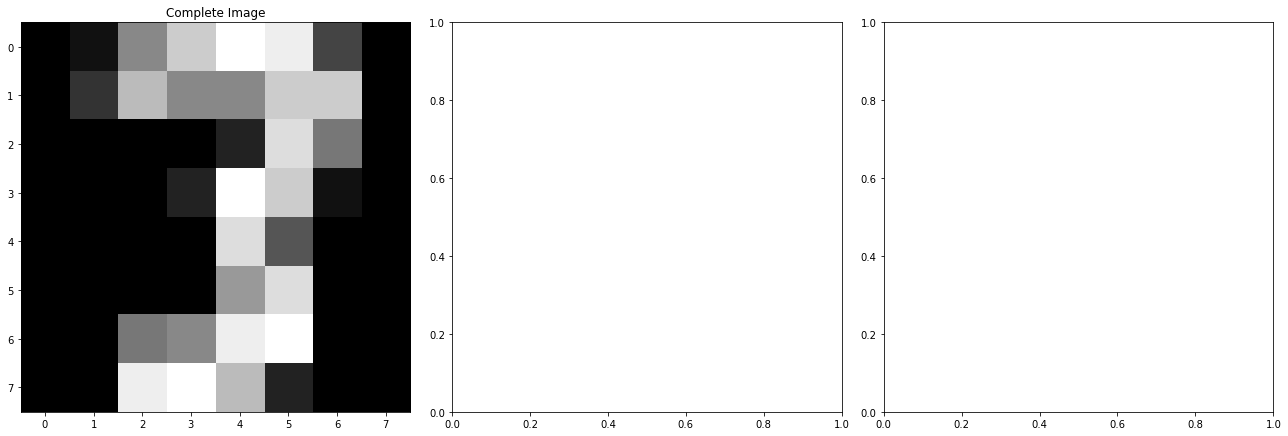

MovieWriter ffmpeg unavailable; using Pillow instead.


In [277]:
fig,ax = plt.subplots(ncols=3, figsize=(18,6))
ax[0].imshow(sample, cmap='gray')
ax[0].set_title('Complete Image')
res = np.zeros(shape=(8,8))


def animate(i):
    res = np.zeros(shape=(8,8))
    comp_i = get_svd_component(i)
    for j in range(i+1):
        comp_j = get_svd_component(j)
        res+= comp_j
    # print(comp_i)
    ax[1].imshow(res,cmap='gray',vmin=0,vmax=16)
    ax[2].imshow(comp_i,cmap='gray',vmin=0,vmax=16)
    ax[2].set_title(f"Component {i+1}")
    ax[1].set_title(f'Image Recreation with {i+1} Components')
# writer = PillowWriter(dpi=100)
anim = FuncAnimation(fig, animate, frames=8, interval=100)
plt.tight_layout()
plt.show()
anim.save('assets/svd.gif', fps=1,dpi=150)

# Principal Components Analysis

In [278]:
# 1. Scaling Data matrix
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = digits.data
scaler = StandardScaler(with_std=False)
X = scaler.fit_transform(dataset)


array([[ 0.        , -0.30383973, -0.20478575, ..., -6.7640512 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973, -5.20478575, ...,  3.2359488 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973, -5.20478575, ...,  9.2359488 ,
         6.93210907, -0.36449638],
       ...,
       [ 0.        , -0.30383973, -4.20478575, ..., -0.7640512 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973, -3.20478575, ...,  5.2359488 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973,  4.79521425, ...,  5.2359488 ,
        -1.06789093, -0.36449638]])

## Scikit Learn PCA


In [280]:
# Sklearn PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_pca

array([[ -1.25946575,  21.27488268,  -9.46305098,  13.01416168],
       [  7.95761174, -20.76870019,   4.43950474, -14.89369073],
       [  6.99192224,  -9.95598536,   2.95855665, -12.28825576],
       ...,
       [ 10.80128337,  -6.96025082,   5.59955689,  -7.22770146],
       [ -4.872099  ,  12.42395272, -10.17085942,  -6.66888143],
       [ -0.34439042,   6.36555169,  10.77370927,  -7.72616962]])

## "From Scratch" PCA

In [287]:
# "From Scratch PCA"
cov_mat = (X.T @ X)
eig_vals, weights = np.linalg.eigh(cov_mat)
weights = weights[:, ::-1]
# Eigh because X^T X is symmetric, 
# Have to swap the order since, eigh function sorts eigenvectors in descending order
eig_vals = eig_vals[::-1]

# np.diag(weights.T @ weights) - Can use this to check if the weights still form
# an orthonormal matrix after reversing the order
reduced_weights = weights[:,:4]

X_pca2 = X@reduced_weights
X_pca2


array([[ -1.25946645, -21.27488348,   9.46305462,  13.01418869],
       [  7.9576113 ,  20.76869896,  -4.43950604, -14.89366444],
       [  6.99192297,   9.95598641,  -2.95855808, -12.28830243],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453,  -7.22773348],
       [ -4.87210009, -12.42395362,  10.17086635,  -6.66885049],
       [ -0.34438963,  -6.36554919, -10.77370849,  -7.72621321]])


## PCA using SVD

In [288]:
# PCA using SVD 
U, SIGMA, VT = np.linalg.svd(X)
reduced_VT = VT.T[:,:4]
X_pca3 = X @ reduced_VT
X_pca3

array([[  1.25946645, -21.27488348,   9.46305462, -13.01418869],
       [ -7.9576113 ,  20.76869896,  -4.43950604,  14.89366444],
       [ -6.99192297,   9.95598641,  -2.95855808,  12.28830243],
       ...,
       [-10.8012837 ,   6.96025223,  -5.59955453,   7.22773348],
       [  4.87210009, -12.42395362,  10.17086635,   6.66885049],
       [  0.34438963,  -6.36554919, -10.77370849,   7.72621321]])

In [292]:
print(pca.singular_values_) # Singular Values
print(eig_vals[:4]**0.5) # Square Root of Eigenvectors - Singular Values

[567.0065665  542.25185421 504.63059421 426.11767607]
[567.0065665  542.25185421 504.63059421 426.11767608]


<AxesSubplot:>

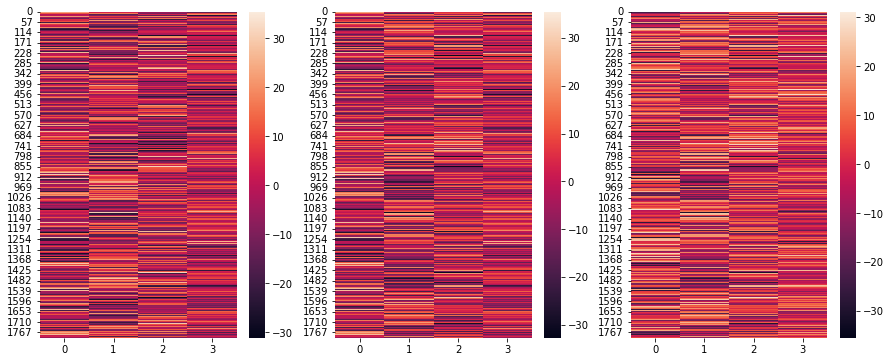

In [296]:
fig,ax = plt.subplots(ncols=3,figsize = (15,6))
sns.heatmap(X_pca,ax=ax[0])
sns.heatmap(X_pca2,ax=ax[1])
sns.heatmap(X_pca3,ax=ax[2])
